In [20]:
!ls $VVS_SHARED/Ephys_Data

leap_250426-250501_vvs-encodingstimuli_z1_rw80-250.h5
nsd_shared1000_6monkeys_2024.h5
paul_20250428-20250430_vvs-encodingstimuli_z1_rw100-400.h5
paul_denoised.npy
red_20250428-20240429_vvs-encodingstimuli_z1_rw100-400.h5
red_20250428-20250430_vvs-encodingstimuli_z1_rw100-400.h5
three0_250426-250430_vvs-encodingstimuli_z1_rw80-250.h5
three0_250426-250501_vvs-encodingstimuli_z1_rw80-250.h5
venus_250426-250429_vvs-encodingstimuli_z1_rw80-250.h5
vvs-accentuate_controlsessions_5monkeys_250504-250512.h5
vvs-accentuate-day1_normalize_paul_241119-241122.h5
vvs-accentuate-day1_normalize_paul_241119.h5
vvs-accentuate-day1_normalize_red_20241212-20241220.h5
vvs-accentuate-day1_raw_paul_241119-241122.h5
vvs-accentuate-day2_normalize_paul_241120.h5
vvs-accentuate-day3_normalize_paul_241124-25.h5
vvs_accentuate_day3_normalize_red_20250123-20250126.hdf5


In [21]:
!echo $VVS_SHARED


/n/holylabs/LABS/alvarez_lab/Lab/VVS_Accentuation


In [22]:
"vvs-accentuate_controlsessions_5monkeys_250504-250512.h5"

'vvs-accentuate_controlsessions_5monkeys_250504-250512.h5'

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import sys
sys.path.append(r"/n/home12/binxuwang/Github/Closed-loop-visual-insilico")
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from core.data_utils import load_neural_data, load_from_hdf5, load_neural_trial_resp_tensor, create_response_tensor
from core.posthoc_prediction_utils import parse_accentuated_filenames_to_df

In [25]:
dataroot = r"/n/holylabs/LABS/alvarez_lab/Lab/VVS_Accentuation/Ephys_Data"
data_path = join(dataroot, 'vvs-accentuate_controlsessions_5monkeys_250504-250512.h5')
data = load_from_hdf5(data_path)

In [ ]:
data

{'leap_250509-250512': {'README': {'neuron_metadata': {'brain_area': 'Brain area / array location.',
    'ncsnr': 'Noise‑ceiling SNR (NSD metric).',
    'peak_respwindow': 'Window used for peak response averaging.',
    'reliability': 'Split‑half reliability of each neuron.',
    'temporal_windows': 'Center of each 10\u202fms time bin.'},
   'repavg': {'response_peak': 'Repeat‑averaged peak response (n_stims, n_neurons).',
    'response_temporal': 'Repeat‑averaged temporal response (n_timepoints, n_stims, n_neurons).',
    'stimulus_name': 'Unique stimulus file names.'},
   'trials': {'response_peak': 'Response of each neuron during the peak window, shape (n_trials, n_neurons).',
    'response_temporal': 'Time‑series response, shape (n_timepoints, n_trials, n_neurons).',
    'session_num': 'Integer session label for each trial.',
    'stimulus_name': 'File name shown on each trial.',
    'stimulus_pos_deg': 'XY position (deg) on each trial.',
    'stimulus_size_pix': 'H×W pixels on eac

In [4]:
print([*data.keys()])

['leap_250509-250512', 'paul_20250505-20250512', 'red_20250504-20250512', 'three0_250508-250512', 'venus_250507-250512']


In [35]:
for subject in data:
    print(subject)
    uniq = np.unique(data[subject]["trials"]["session_num"])
    print(uniq)
    print(len(uniq))
    # break

leap_250509-250512
[b'leap_250509' b'leap_250510' b'leap_250511' b'leap_250512']
4
paul_20250505-20250512
[b'paul_20250505a' b'paul_20250505b' b'paul_20250506a' b'paul_20250506b'
 b'paula_20250507' b'paula_20250508' b'paulb_20250507' b'paulb_20250508'
 b'paulb_20250509' b'paulb_20250510' b'paulb_20250511' b'paulb_20250512']
12
red_20250504-20250512
[b'red_20250504a' b'red_20250504b' b'red_20250505a' b'red_20250505b'
 b'red_20250506a' b'red_20250506b' b'red_20250507a' b'red_20250507b'
 b'reda_20250508' b'redb_20250508' b'redb_20250509' b'redb_20250510'
 b'redb_20250511' b'redb_20250512']
14
three0_250508-250512
[b'three0_250508' b'three0b_250509' b'three0b_250510' b'three0b_250511'
 b'three0b_250512']
5
venus_250507-250512
[b'venusa_250507' b'venusa_250508' b'venusb_250507' b'venusb_250508'
 b'venusb_250509' b'venusb_250510' b'venusb_250511' b'venusb_250512']
8


In [33]:
for subject in data:
    print(subject)
    print(np.unique(data[subject]["trials"]["session_dates"]))
    # break

leap_250509-250512
[b'250509' b'250510' b'250511' b'250512']
paul_20250505-20250512
[b'20250505' b'20250506' b'20250507' b'20250508' b'20250509' b'20250510'
 b'20250511' b'20250512']
red_20250504-20250512
[b'20250504' b'20250505' b'20250506' b'20250507' b'20250508' b'20250509'
 b'20250510' b'20250511' b'20250512']
three0_250508-250512
[b'250508' b'250509' b'250510' b'250511' b'250512']
venus_250507-250512
[b'250507' b'250508' b'250509' b'250510' b'250511' b'250512']


In [29]:
list(data[subject]["trials"])

['response_peak',
 'response_temporal',
 'session_dates',
 'session_num',
 'stimulus_name']

array([b'250509', b'250510', b'250511', b'250512'], dtype=object)

In [4]:
subject_id = "paul_20250505-20250512"#'red_20250504-20250512'

In [16]:
list(data[subject_id])

['README', 'neuron_metadata', 'repavg', 'stimulus_meta', 'trials']

In [19]:
[*data[subject_id]["neuron_metadata"]]

['mu',
 'ncsnr',
 'peak_respwindow',
 'reliability',
 'sigma',
 'temporal_windows',
 'brain_area']

In [17]:
data[subject_id]["trials"]

{'response_peak': array([[-0.9605237 ,  2.8848004 , -0.26200697, ..., -0.803327  ,
         -0.09828922,  1.4243351 ],
        [ 0.82321036, -0.58843213,  1.028292  , ..., -0.803327  ,
          1.0539802 , -1.0302807 ],
        [-0.06865667, -0.58843213,  1.1358168 , ..., -0.803327  ,
         -0.674424  ,  1.3127615 ],
        ...,
        [ 0.5167551 , -0.7782487 ,  1.2745337 , ...,  0.05987116,
          0.2999867 , -0.12875117],
        [ 0.5167551 ,  1.2336667 , -0.4070457 , ..., -0.53285897,
         -0.9315309 , -0.6466844 ],
        [ 0.5167551 , -0.7782487 ,  0.46086624, ..., -0.08831134,
          0.71049255,  2.2019486 ]], dtype=float32),
 'response_temporal': array([[[  0.,   0.,   0., ...,  40.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,  40., ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0., ...,   0.,   0.,  40.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,  

In [11]:
subject_id = 'red_20250504-20250512'
# subject_id = "paul_20250505-20250512"
respmat = data[subject_id]["repavg"]['response_peak']
stimnames = data[subject_id]["repavg"]["stimulus_name"]
print("respmat.shape", respmat.shape)
print("stimnames.shape", stimnames.shape)
stimnames_str = [s.decode('utf-8') for s in stimnames]
df_allstim = parse_accentuated_filenames_to_df(stimnames_str, include_parse_fail=True)
df_accentuated = df_allstim.query("model_name.notna()").copy()
df_accentuated["neural_activation"] = np.nan
for idx, row in df_accentuated.iterrows():
    unit_id = row["unit_id"]
    df_accentuated.loc[idx, "neural_activation"] = respmat[idx, unit_id]

df_accentuated.head()

respmat.shape (5575, 64)
stimnames.shape (5575,)


,model_name,unit_id,img_id,level,score,filepath,neural_activation
0,AlexNet_training_seed_01,0,0,-0.228237,-0.221289,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,0.431920
1,AlexNet_training_seed_01,0,0,-1.037346,-1.027856,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,0.398581
2,AlexNet_training_seed_01,0,0,-1.846455,-1.838532,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,1.373433
3,AlexNet_training_seed_01,0,0,0.580873,0.572135,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,0.567470
4,AlexNet_training_seed_01,0,0,1.389982,1.380919,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,0.260936


In [10]:
df_accentuated.tail()

,model_name,unit_id,img_id,level,score,filepath,neural_activation
5569,siglip2_vitb16,9,9,2.701443,2.691693,siglip2_vitb16_RidgeCV_unit_9_img_9_level_2.70...,-0.145980
5570,siglip2_vitb16,9,9,3.442825,3.434636,siglip2_vitb16_RidgeCV_unit_9_img_9_level_3.44...,0.876949
5571,siglip2_vitb16,9,9,4.184206,4.18034,siglip2_vitb16_RidgeCV_unit_9_img_9_level_4.18...,0.449348
5572,siglip2_vitb16,9,9,4.925587,4.921776,siglip2_vitb16_RidgeCV_unit_9_img_9_level_4.92...,-0.821746
5573,siglip2_vitb16,9,9,5.666968,5.657128,siglip2_vitb16_RidgeCV_unit_9_img_9_level_5.66...,-0.055597


In [6]:
df_accentuated

,model_name,unit_id,img_id,level,score,filepath,neural_activation
0,AlexNet_training_seed_01,0,0,-0.228237,-0.221289,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,0.431920
1,AlexNet_training_seed_01,0,0,-1.037346,-1.027856,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,0.398581
2,AlexNet_training_seed_01,0,0,-1.846455,-1.838532,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,1.373433
3,AlexNet_training_seed_01,0,0,0.580873,0.572135,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,0.567470
4,AlexNet_training_seed_01,0,0,1.389982,1.380919,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,0.260936
...,...,...,...,...,...,...,...
5570,siglip2_vitb16,9,9,3.442825,3.434636,siglip2_vitb16_RidgeCV_unit_9_img_9_level_3.44...,NaN
5571,siglip2_vitb16,9,9,4.184206,4.18034,siglip2_vitb16_RidgeCV_unit_9_img_9_level_4.18...,NaN
5572,siglip2_vitb16,9,9,4.925587,4.921776,siglip2_vitb16_RidgeCV_unit_9_img_9_level_4.92...,NaN
5573,siglip2_vitb16,9,9,5.666968,5.657128,siglip2_vitb16_RidgeCV_unit_9_img_9_level_5.66...,NaN


In [ ]:
subject_id = 'red_20250504-20250512'
# subject_id = "paul_20250505-20250512"
respmat = data[subject_id]["repavg"]['response_peak']
stimnames = data[subject_id]["repavg"]["stimulus_name"]
print("respmat.shape", respmat.shape)
print("stimnames.shape", stimnames.shape)
stimnames_str = [s.decode('utf-8') for s in stimnames]
df_accentuated = parse_accentuated_filenames_to_df(stimnames_str, include_parse_fail=True)
# df_accentuated = parse_accentuated_filenames_to_df(stimnames_str, include_parse_fail=True)
df_accentuated["neural_activation"] = np.nan
for idx, row in df_accentuated.iterrows():
    unit_id = row["unit_id"]
    df_accentuated.loc[idx, "neural_activation"] = respmat[idx, unit_id]

df_accentuated.head()

In [21]:
stimnames[0]

b'AlexNet_training_seed_01_RidgeCV_unit_0_img_0_level_-0.2282366166114813_score_-0.22128941118717194.png'

In [19]:
df_accentuated.query("model_name == 'siglip2_vitb16'")

,model_name,unit_id,img_id,level,score,filepath,neural_activation
4928,siglip2_vitb16,0,0,-0.228237,-0.219138,siglip2_vitb16_RidgeCV_unit_0_img_0_level_-0.2...,-0.500497
4929,siglip2_vitb16,0,0,-1.037346,-1.027777,siglip2_vitb16_RidgeCV_unit_0_img_0_level_-1.0...,-0.185728
4930,siglip2_vitb16,0,0,-1.846455,-1.192481,siglip2_vitb16_RidgeCV_unit_0_img_0_level_-1.8...,0.223225
4931,siglip2_vitb16,0,0,0.580873,0.572720,siglip2_vitb16_RidgeCV_unit_0_img_0_level_0.58...,-0.399277
4932,siglip2_vitb16,0,0,1.389982,1.387294,siglip2_vitb16_RidgeCV_unit_0_img_0_level_1.38...,0.845314
...,...,...,...,...,...,...,...
5470,siglip2_vitb16,9,9,2.701443,2.691693,siglip2_vitb16_RidgeCV_unit_9_img_9_level_2.70...,0.676292
5471,siglip2_vitb16,9,9,3.442825,3.434636,siglip2_vitb16_RidgeCV_unit_9_img_9_level_3.44...,1.302672
5472,siglip2_vitb16,9,9,4.184206,4.180340,siglip2_vitb16_RidgeCV_unit_9_img_9_level_4.18...,0.199808
5473,siglip2_vitb16,9,9,4.925587,4.921776,siglip2_vitb16_RidgeCV_unit_9_img_9_level_4.92...,1.040280


In [6]:
df_accentuated.model_name.unique()

array(['AlexNet_training_seed_01', 'clipag_vitb32', 'dinov2_vitb14_reg',
       'radio_v2.5-b', 'regnety_640', 'resnet50', 'resnet50_clip',
       'resnet50_dino', 'resnet50_robust', 'siglip2_vitb16'], dtype=object)

In [7]:
df_accentuated.unit_id.unique()

array([ 0, 24, 40, 47,  8])

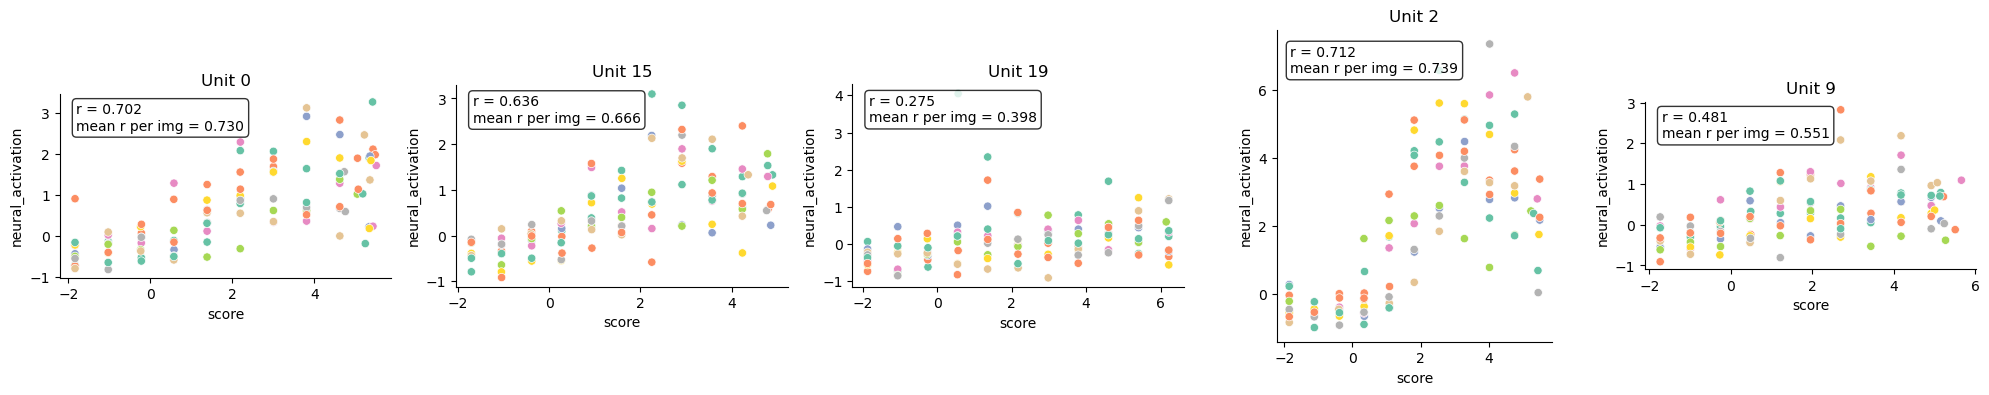

In [12]:
model_name = "clipag_vitb32"
unit_ids = df_accentuated.unit_id.unique()  # Based on the context showing these unit IDs

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, unit_id in enumerate(unit_ids):
    model_unit_df = df_accentuated.query("model_name == @model_name and unit_id == @unit_id")
    
    sns.scatterplot(data=model_unit_df, 
                    x="score", y="neural_activation", hue="img_id", 
                    palette="Set2", ax=axes[i])
    
    corr_per_img = []
    for img_id in model_unit_df["img_id"].unique():
        subset = model_unit_df.query("img_id == @img_id")
        corr_per_img.append(subset["score"].corr(subset["neural_activation"]))
        # sns.regplot(data=subset, x="score", y="neural_activation", 
        #             scatter=False, ax=axes[i])
    
    # Calculate correlation coefficient for this unit
    corr_r = model_unit_df["score"].corr(model_unit_df["neural_activation"])
    corr_r_per_img_mean = np.mean(corr_per_img)
    axes[i].text(0.05, 0.95, f'r = {corr_r:.3f}\nmean r per img = {corr_r_per_img_mean:.3f}', 
                 transform=axes[i].transAxes, 
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    axes[i].set_title(f"Unit {unit_id}")
    axes[i].set_aspect(1.0)
    axes[i].legend().remove()  # Remove individual legends to avoid clutter

plt.tight_layout()
plt.show()

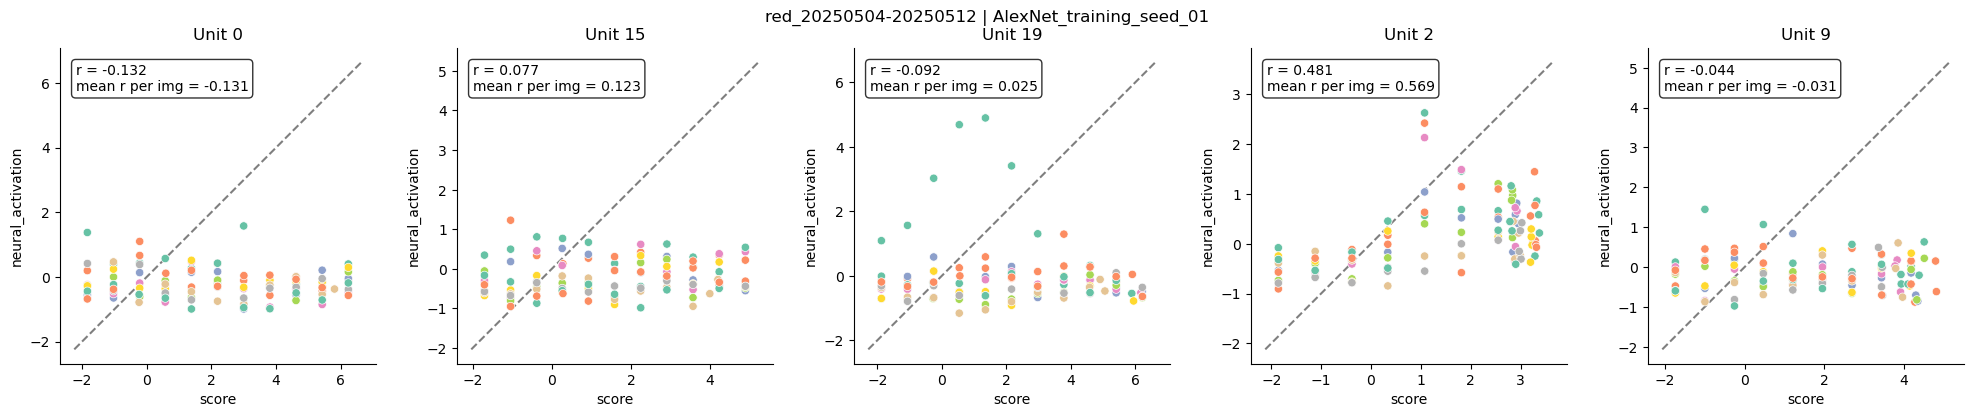

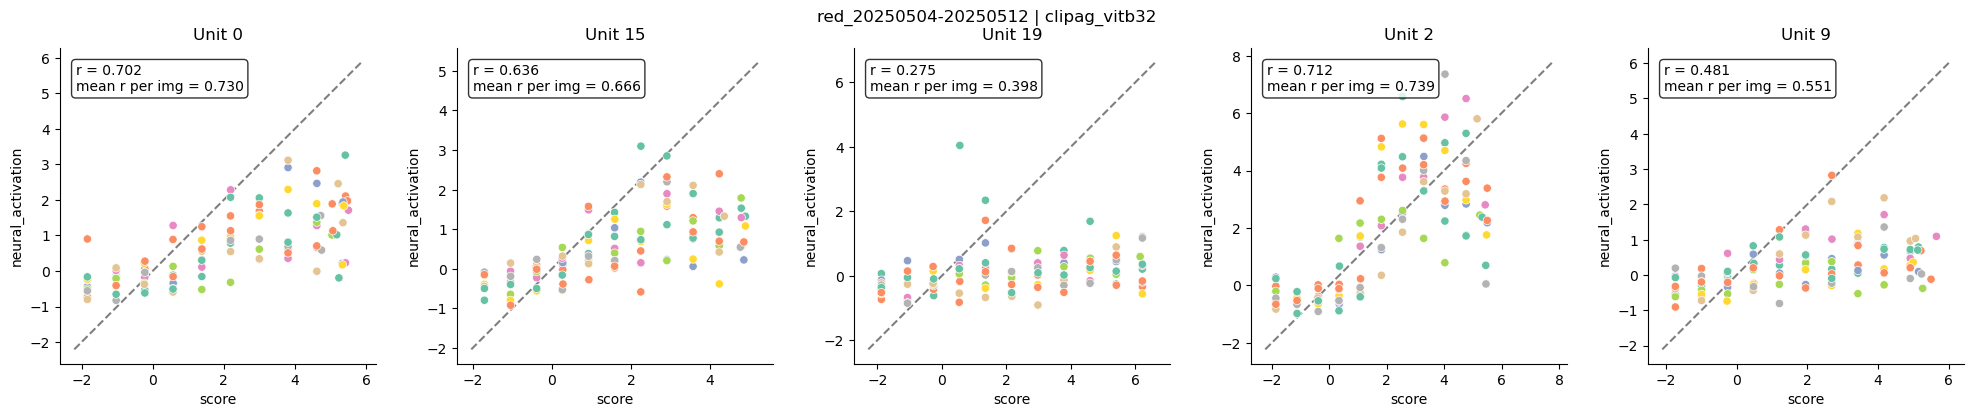

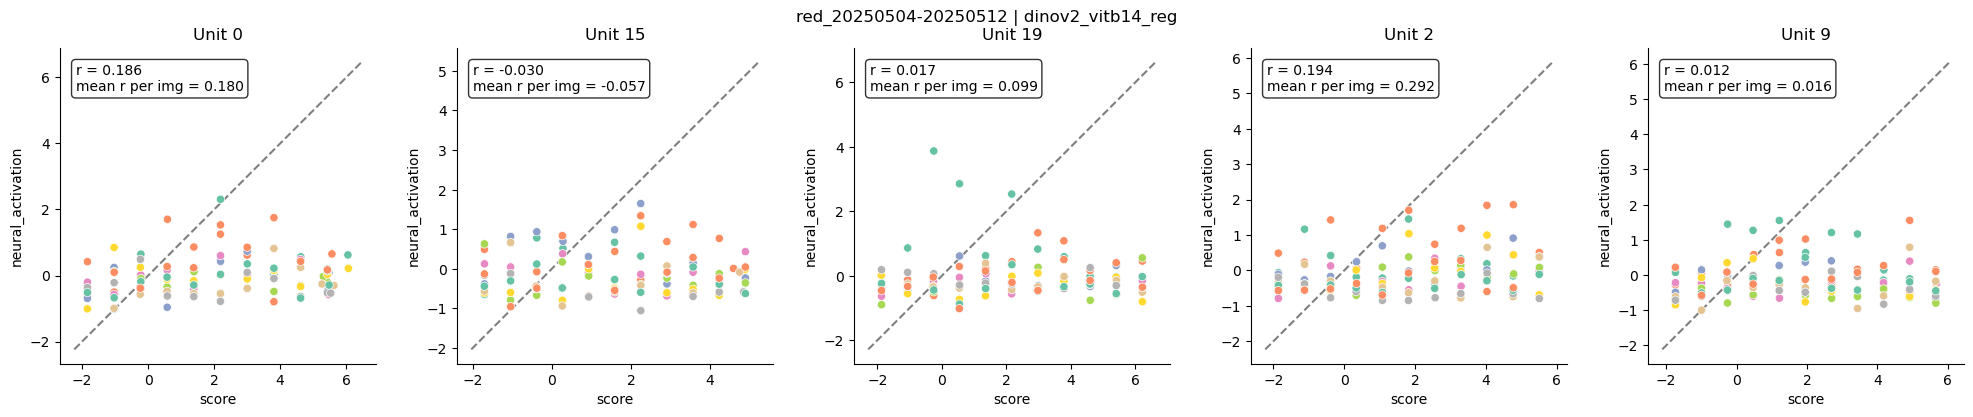

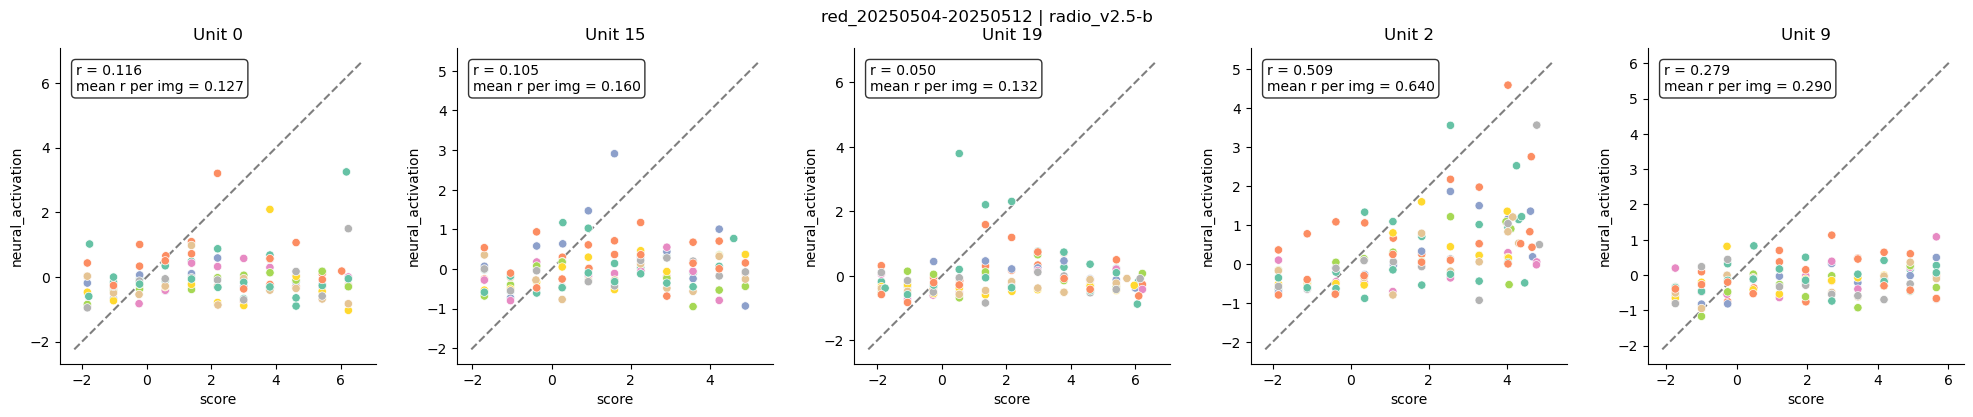

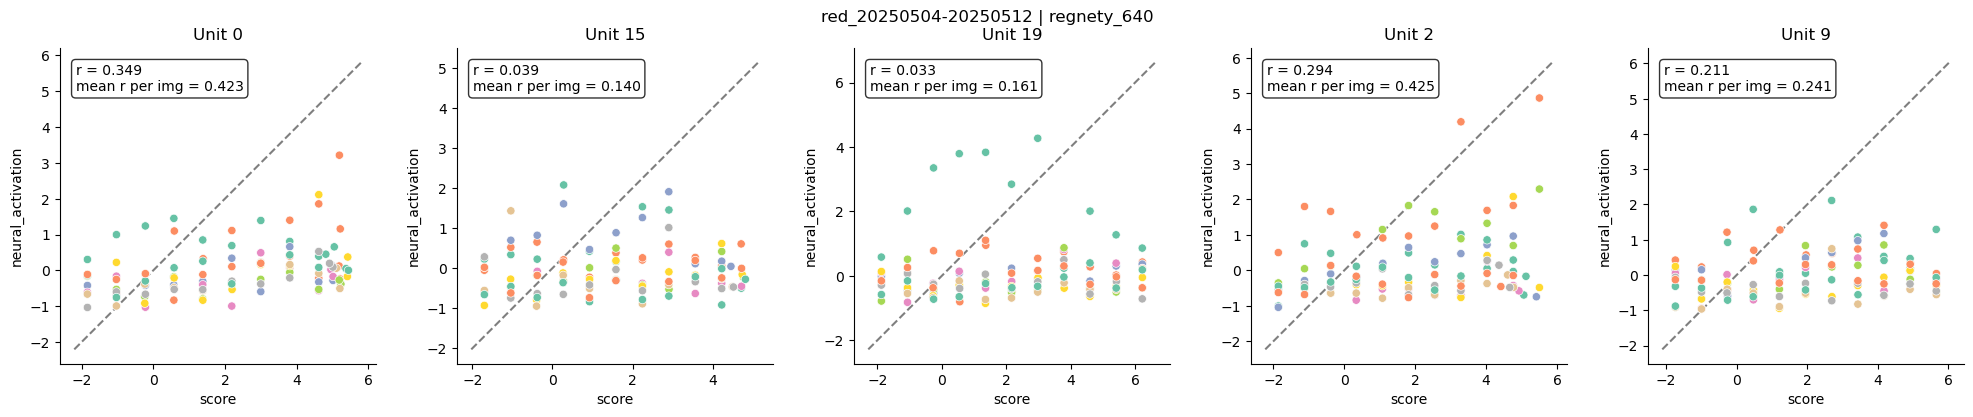

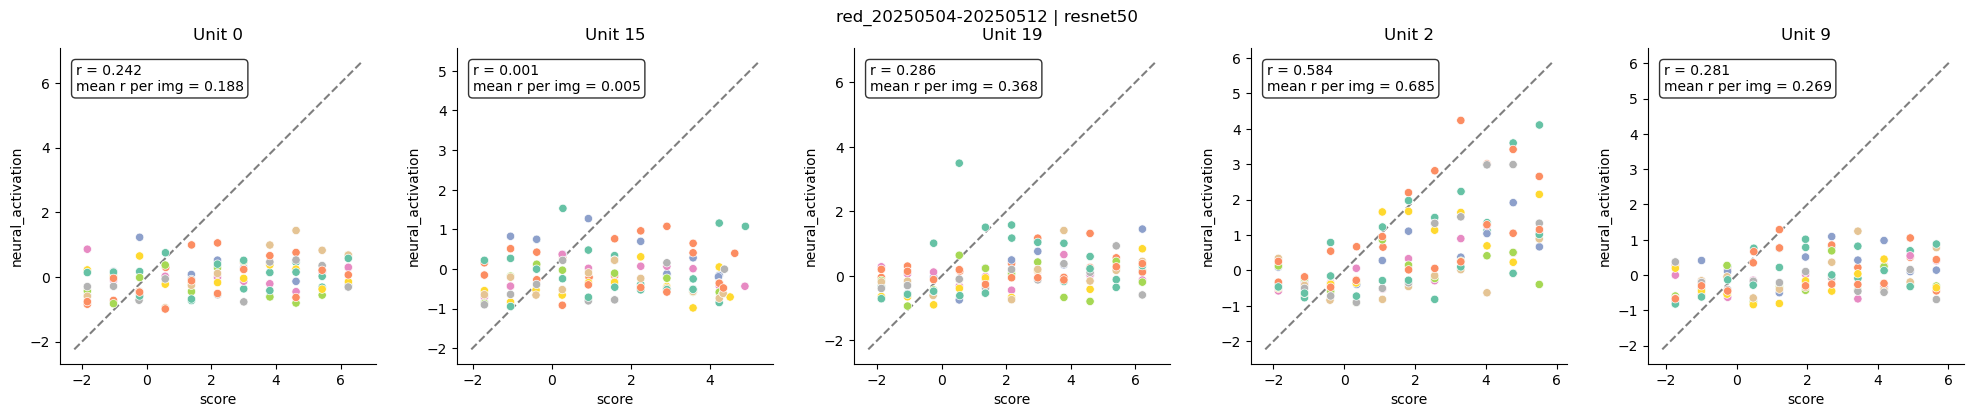

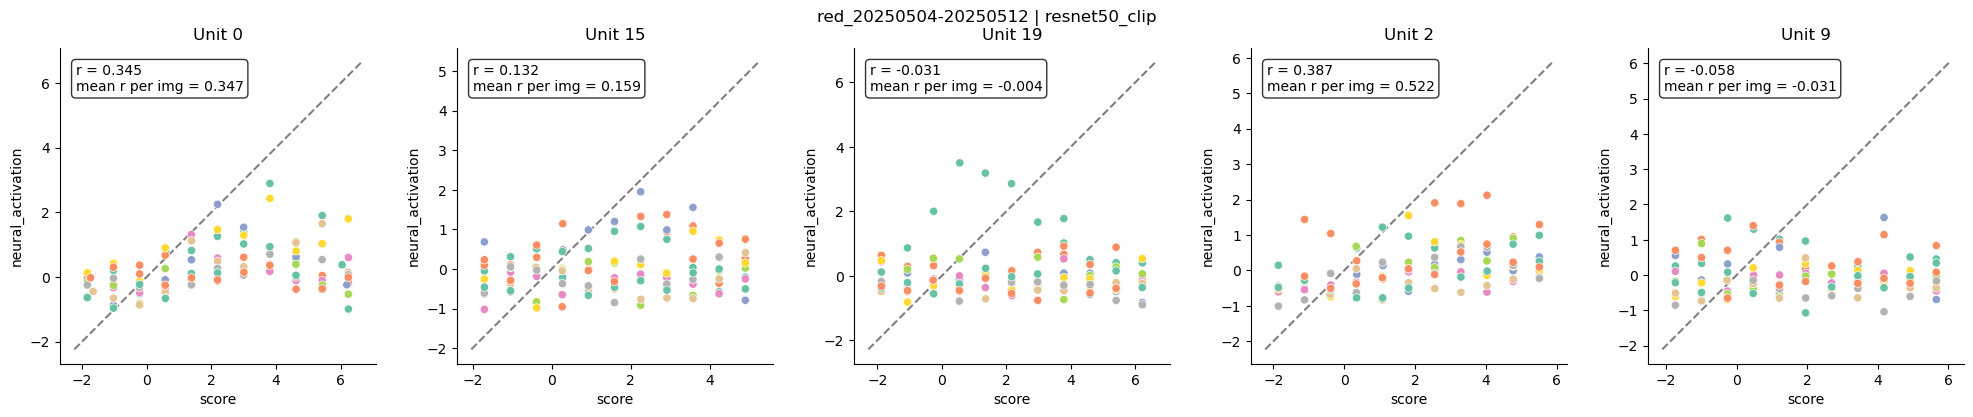

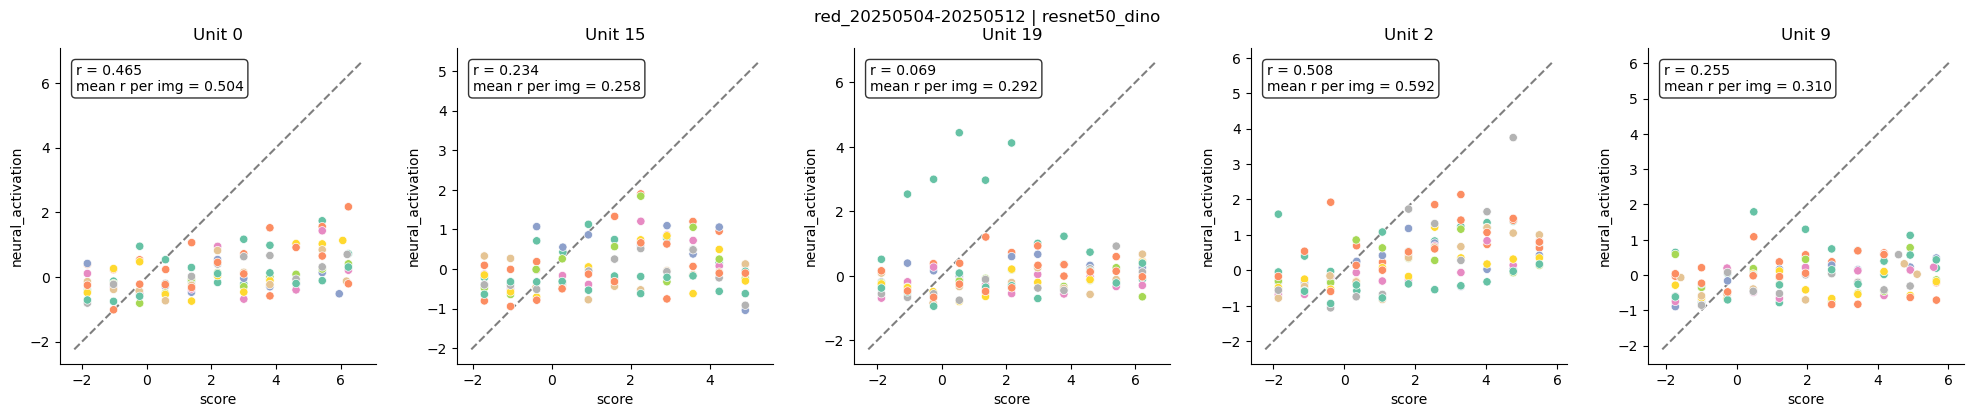

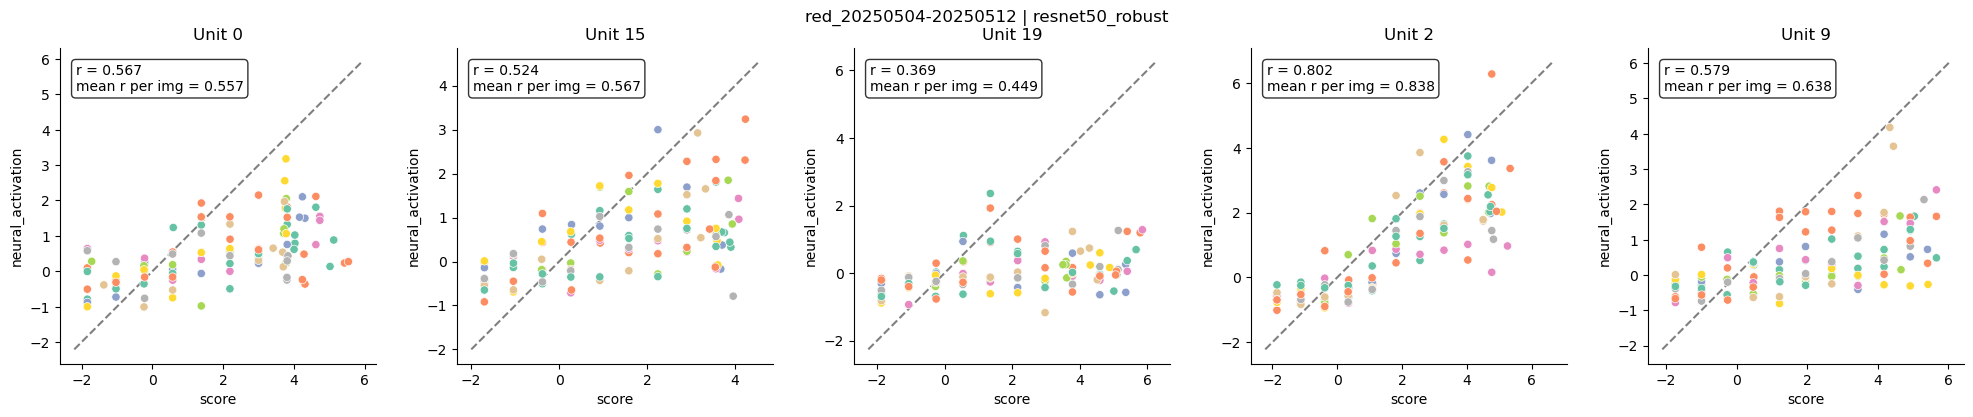

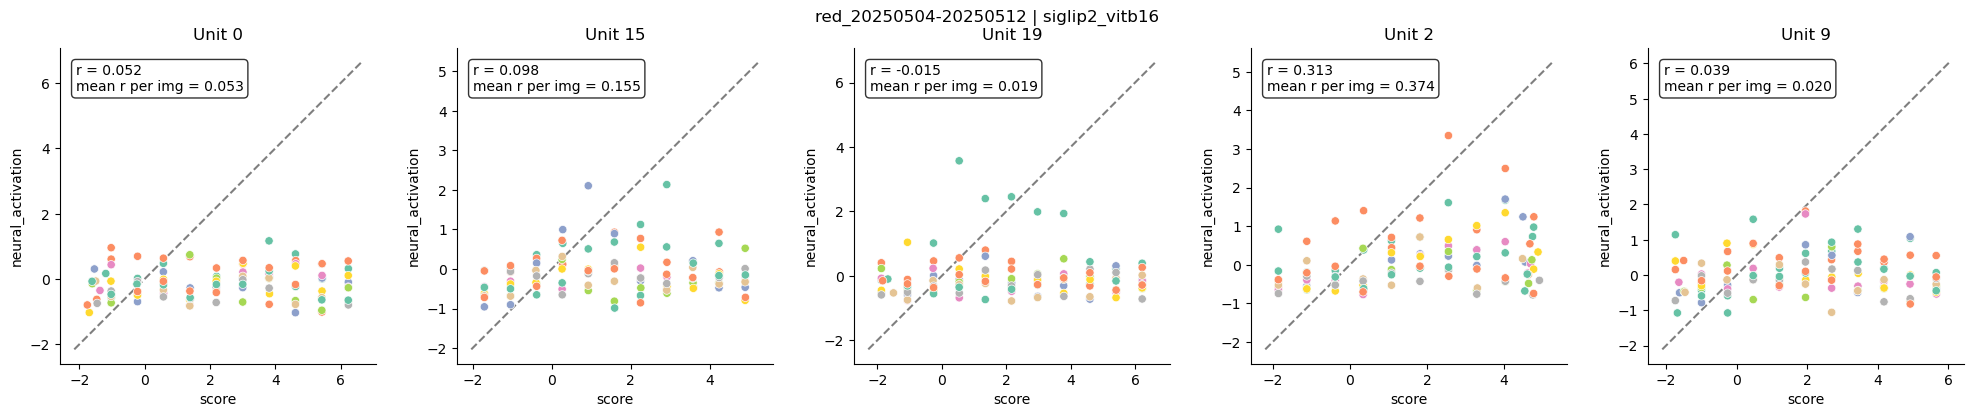

In [15]:
for model_name in df_accentuated.model_name.unique():
    unit_ids = df_accentuated.unit_id.unique()  # Based on the context showing these unit IDs
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, unit_id in enumerate(unit_ids):
        model_unit_df = df_accentuated.query("model_name == @model_name and unit_id == @unit_id")
        sns.scatterplot(data=model_unit_df, 
                        x="score", y="neural_activation", hue="img_id", 
                        palette="Set2", ax=axes[i])
        
        corr_per_img = []
        for img_id in model_unit_df["img_id"].unique():
            subset = model_unit_df.query("img_id == @img_id")
            corr_per_img.append(subset["score"].corr(subset["neural_activation"]))
            # sns.regplot(data=subset, x="score", y="neural_activation", 
            #             scatter=False, ax=axes[i])
        
        # Calculate correlation coefficient for this unit
        corr_r = model_unit_df["score"].corr(model_unit_df["neural_activation"])
        corr_r_per_img_mean = np.mean(corr_per_img)
        axes[i].text(0.05, 0.95, f'r = {corr_r:.3f}\nmean r per img = {corr_r_per_img_mean:.3f}', 
                    transform=axes[i].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        axes[i].set_title(f"Unit {unit_id}")
        axes[i].set_aspect(1.0)
        # Add diagonal line
        lims = [
            np.min([axes[i].get_xlim(), axes[i].get_ylim()]),  # min of both axes
            np.max([axes[i].get_xlim(), axes[i].get_ylim()]),  # max of both axes
        ]
        axes[i].plot(lims, lims, 'k--', alpha=0.5, zorder=0)
        axes[i].legend().remove()  # Remove individual legends to avoid clutter
    plt.suptitle(f"{subject_id} | {model_name}")
    plt.tight_layout()
    plt.show()

In [ ]:
model_name = "resnet50_robust"
unit_id = 0
model_unit_df = df_accentuated.query("model_name == @model_name and unit_id == @unit_id")
model_unit_df.head()
model_unit_df.shape
model_unit_df.clone()

(109, 6)

In [ ]:
model_unit_df["target_unit_score"] = respmat[model_unit_df.index, unit_id]

/tmp/ipykernel_1719592/1062017880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_unit_df["target_unit_score"] = respmat[model_unit_df.index, unit_id]


In [ ]:
model_unit_df["target_unit_score"]

4381   -0.146195
4382   -0.275518
4383   -0.457103
4384    0.520639
4385   -0.908592
          ...   
4485    0.126060
4486    1.969473
4487    0.538834
4488   -0.763465
4489    0.271944
Name: target_unit_score, Length: 109, dtype: float64

In [ ]:
stimnames_str = [s.decode('utf-8') for s in stimnames]
df_accentuated = parse_accentuated_filenames_to_df((stimnames_str))
df_accentuated.head()

,model_name,unit_id,img_id,level,score,filepath
0,AlexNet_training_seed_01,0,0,-0.228237,-0.221289,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...
1,AlexNet_training_seed_01,0,0,-1.037346,-1.027856,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...
2,AlexNet_training_seed_01,0,0,-1.846455,-1.838532,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...
3,AlexNet_training_seed_01,0,0,0.580873,0.572135,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...
4,AlexNet_training_seed_01,0,0,1.389982,1.380919,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...


In [ ]:
df_accentuated["neural_activation"] = np.nan
for idx, row in df_accentuated.iterrows():
    unit_id = row["unit_id"]
    df_accentuated.loc[idx, "neural_activation"] = respmat[idx, unit_id]

df_accentuated

,model_name,unit_id,img_id,level,score,filepath,neural_activation
0,AlexNet_training_seed_01,0,0,-0.791404,-0.781521,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,-0.600622
1,AlexNet_training_seed_01,0,0,-1.639667,-1.630101,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,-0.772059
2,AlexNet_training_seed_01,0,0,-2.487929,-2.478870,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,-0.634088
3,AlexNet_training_seed_01,0,0,0.056858,0.047263,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,-0.873841
4,AlexNet_training_seed_01,0,0,0.905120,0.895845,AlexNet_training_seed_01_RidgeCV_unit_0_img_0_...,-0.887687
...,...,...,...,...,...,...,...
5077,siglip2_vitb16,8,9,1.949510,1.941033,siglip2_vitb16_RidgeCV_unit_8_img_9_level_1.94...,-0.081242
5078,siglip2_vitb16,8,9,2.540779,2.530880,siglip2_vitb16_RidgeCV_unit_8_img_9_level_2.54...,0.728954
5079,siglip2_vitb16,8,9,3.132048,3.130183,siglip2_vitb16_RidgeCV_unit_8_img_9_level_3.13...,-0.946157
5080,siglip2_vitb16,8,9,3.723318,3.557235,siglip2_vitb16_RidgeCV_unit_8_img_9_level_3.72...,-0.207408
